
# Smartwatch Health Data EDA
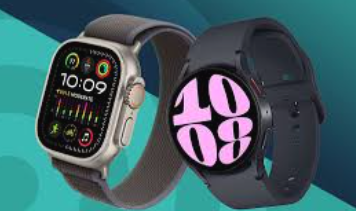

Link to the dataset: [Kaggle](https://www.kaggle.com/datasets/mohammedarfathr/smartwatch-health-data-uncleaned)

This is an unclean dataset was uploaded to Kaggle for users to practice in cleaning data. The data has 7 columns and 10,000 rows.

---

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Putting the CSV as a pandas dataframe
df = pd.read_csv('unclean_smartwatch_health_data.csv')

# Showing the dataframe
df.head(5)

# We're currently noticing a number of values which have the wrong 
# attributes, many NaN values, and the sleep duration column has a 
# number of values with the string 'ERROR' in them. 

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6


---
# Cleaning

In [2]:
# Let's check how many values we have in the dataset.

df.count()

# We have plenty of rows to work with.

User ID                   9799
Heart Rate (BPM)          9600
Blood Oxygen Level (%)    9700
Step Count                9900
Sleep Duration (hours)    9850
Activity Level            9800
Stress Level              9800
dtype: int64

In [3]:
# Checking for null values.
df.isna().sum()

# We do have a a number of null values, let's get rid of these
# and see how many rows we have left.

User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

In [4]:
# Dropping all rows with NaN values
df = df.dropna()
df.count()

# As we can see, there still are plenty of rows left.

User ID                   8543
Heart Rate (BPM)          8543
Blood Oxygen Level (%)    8543
Step Count                8543
Sleep Duration (hours)    8543
Activity Level            8543
Stress Level              8543
dtype: int64

In [5]:

# Getting rid of leading and trailing white spaces in the columns of the dataset.
df.columns = df.columns.str.strip() 


df.rename(columns={df.columns[4]: 'Sleep Duration'}, inplace=True)


In [6]:
# Checking the datatypes.
df.dtypes

User ID                   float64
Heart Rate (BPM)          float64
Blood Oxygen Level (%)    float64
Step Count                float64
Sleep Duration             object
Activity Level             object
Stress Level               object
dtype: object

In [7]:
# There are 218 rows which have the string 'ERROR' in the 'Sleep Duration' column.
df[df['Sleep Duration'] == 'ERROR'].count()

User ID                   218
Heart Rate (BPM)          218
Blood Oxygen Level (%)    218
Step Count                218
Sleep Duration            218
Activity Level            218
Stress Level              218
dtype: int64

In [8]:
# This drops the ERROR sleep duration rows. The ~ is a negator, just
# like != and other negators.
df = df[~df['Sleep Duration'].str.contains('ERROR')]

# Confirmation that 'ERROR' values have been correctly cleaned.
df[df['Sleep Duration'] == 'ERROR'].count()

User ID                   0
Heart Rate (BPM)          0
Blood Oxygen Level (%)    0
Step Count                0
Sleep Duration            0
Activity Level            0
Stress Level              0
dtype: int64

In [9]:
# Values in the stress level are ranged between 1 and 10, but
# some row values show 'very high' as a value. Let's change that 
# to 10 instead.

# Replaces 'Very High' to 'Very High'
df['Stress Level'] = df['Stress Level'].str.replace('Very High','10')
# Replaces 'Seddentary' to 'Sedentary'
df['Activity Level'] = df['Activity Level'].str.replace('Seddentary','Sedentary')
# Replaces 'Very_High to 'Very High'  
df['Activity Level'] = df['Activity Level'].str.replace('Highly_Active','Highly Active')


In [10]:
# Some datatypes are incorrect and need to be fixed.

df['Step Count'] = df['Step Count'].astype(int)
df['Sleep Duration'] = df['Sleep Duration'].astype(float)
df['Stress Level'] = df['Stress Level'].astype(int)
df['User ID'] = df['User ID'].astype(int)

# I decided to change step count to integer since it does not
# seem intuitive to count a fractional step.

In [11]:
# Setting the index as 'User ID'
df.set_index('User ID')
df.head(3)

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration,Activity Level,Stress Level
0,4174,58.939776,98.809650,5450,7.167236,Highly Active,1
3,2294,40.000000,96.894213,13797,7.367790,Actve,3
5,2095,96.285938,94.202910,10205,8.378343,Highly Active,10


In [12]:
df

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration,Activity Level,Stress Level
0,4174,58.939776,98.809650,5450,7.167236,Highly Active,1
3,2294,40.000000,96.894213,13797,7.367790,Actve,3
5,2095,96.285938,94.202910,10205,8.378343,Highly Active,10
6,4772,47.272257,95.389760,3208,7.871146,Sedentary,2
7,4092,81.733497,95.981343,6051,5.224139,Sedentary,1
...,...,...,...,...,...,...,...
9994,1942,77.912299,98.640583,10061,5.428635,Sedentary,10
9995,1524,78.819386,98.931927,2948,7.402749,Active,7
9996,4879,48.632659,95.773035,4725,6.382166,Sedentary,2
9997,2624,73.834442,97.945874,2571,6.916549,Sedentary,4


In [13]:
df.sample(2000)

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration,Activity Level,Stress Level
6217,3330,79.842253,100.000000,3431,7.924933,Sedentary,2
37,3904,87.529086,100.000000,4441,8.531279,Sedentary,5
3005,4312,63.645205,98.826143,1035,6.255582,Sedentary,6
4047,3126,77.261500,97.364437,6629,6.506133,Highly Active,8
4656,3041,94.854453,98.163447,3417,7.405415,Sedentary,8
...,...,...,...,...,...,...,...
624,1559,81.991824,94.990390,7966,8.154816,Active,1
7816,4502,82.450519,97.469876,1730,4.930291,Actve,8
4022,1343,86.880968,99.925376,5928,1.287444,Highly Active,7
6754,4716,52.370513,97.961977,3713,6.535655,Sedentary,1


---
# EDA

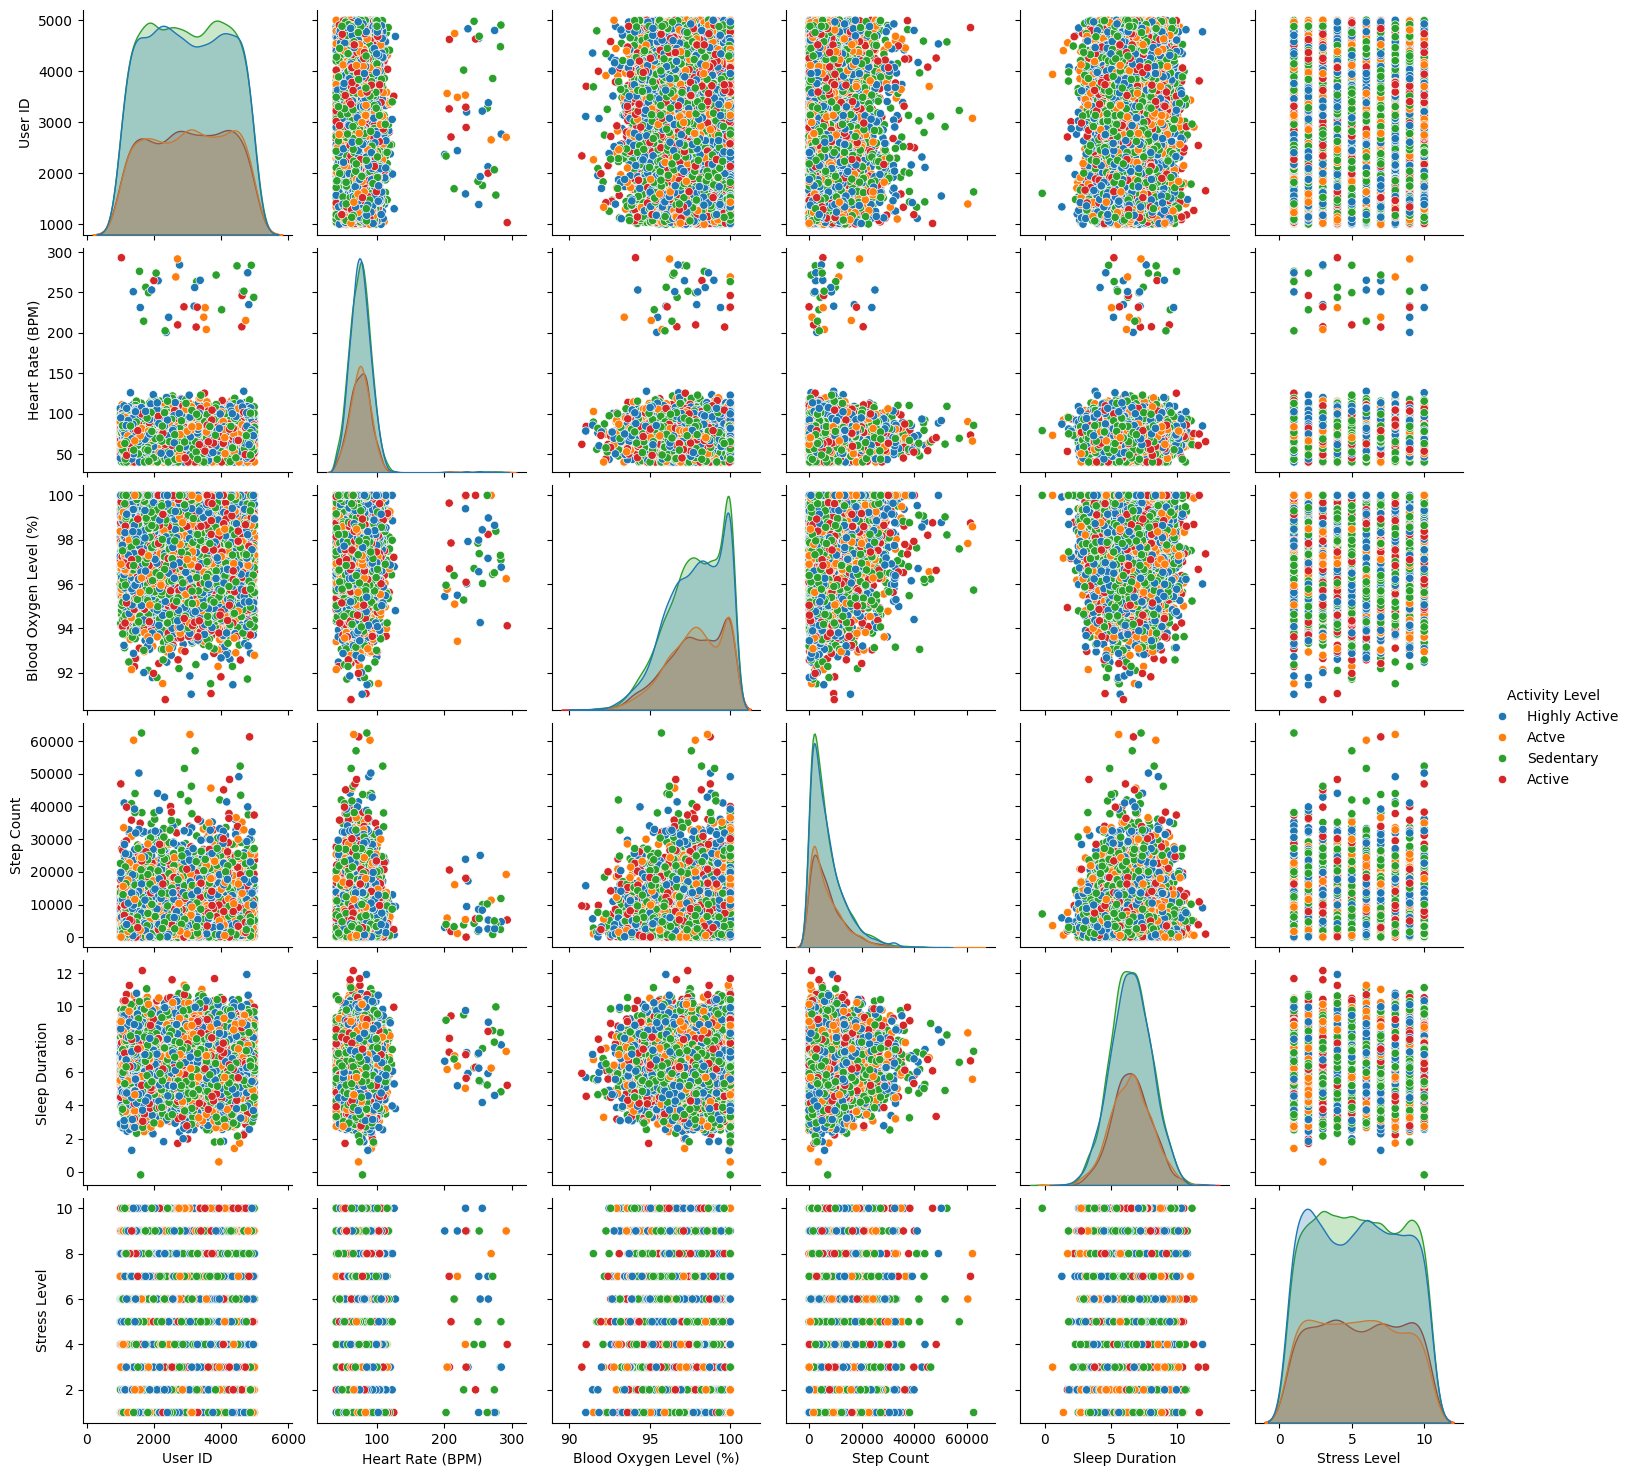

In [15]:
sns.pairplot(df, hue='Activity Level')